# Forest Cover Clasification Notebook

This notebook consists of the Machine Learning challenge of data tratement subject at UC3M. The main goal is to develop a algorythm capable of identifying in the dataset the type of forest cover in a specific region.

## 1º Import relevant modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.model_selection import ValidationCurve
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import ValidationCurve

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import ExtraTreesClassifier


# Cambiamos el display para que nos muestre todas las columnas
pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline

## 2º Load Datasets

In [2]:
path = "../DATASETS/data_train.csv"
data_train_df = pd.read_csv(path)
data_train_df.shape

(314110, 55)

In [3]:
path = "../DATASETS/data_test.csv"
data_test_df = pd.read_csv(path)
data_test_df.shape

(257000, 54)

## 3º Data analysis

In [ ]:
data_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,0.980624,0.445170,0.224098,0.174965,0.234045,0.404266,0.569076,0.952541,0.332439,0.728330,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.882375,0.546384,0.267411,0.017311,0.291086,0.123742,0.713647,0.854539,0.712140,0.461130,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.789272,0.286576,0.414764,0.360986,0.412652,0.308961,0.592817,0.901199,0.732615,0.807599,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.796037,0.533037,0.041173,0.077470,0.308623,0.265189,0.586398,0.871460,0.737043,0.667451,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.980623,0.494135,0.166972,0.170760,0.250404,0.322445,0.497661,0.867226,0.498590,0.864050,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
data_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
count,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,3.141100e+05,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.00000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000,314110.000000
mean,0.820447,0.534821,0.198630,0.131070,0.303299,0.215840,0.572652,0.822346,0.652913,5.525746e-01,0.436334,0.065270,0.447245,0.051151,0.044214,0.003206,0.000229,0.014845,0.004438,0.056694,0.000006,0.023944,0.000856,0.036589,0.005517,0.057429,0.090535,0.008640,0.011547,0.001576,0.00702,0.013062,0.077584,0.051829,0.001958,0.004938,0.030145,0.001031,0.003276,0.050966,0.000535,0.198310,0.000280,0.001910,0.026835,0.098529,0.001471,0.015714,0.021387,0.000204,0.021235,0.006036,0.002738,0.002741,1.060714
std,0.145353,0.099205,0.108300,0.083399,0.077457,0.220730,0.141050,0.111428,0.223053,3.114275e-01,0.495931,0.247002,0.497210,0.220306,0.205570,0.056530,0.015138,0.120933,0.066470,0.231256,0.002523,0.152874,0.029252,0.187751,0.074073,0.232661,0.286947,0.092551,0.106835,0.039666,0.08349,0.113542,0.267517,0.221682,0.044205,0.070096,0.170988,0.032100,0.057142,0.219929,0.023121,0.398727,0.016736,0.043664,0.161600,0.298029,0.038323,0.124368,0.144672,0.014273,0.144166,0.077458,0.052253,0.052284,1.405211
min,0.005509,0.000000,0.000000,0.000002,0.009939,0.000000,0.001100,0.000000,0.000000,2.843449e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.745054,0.488168,0.124603,0.073184,0.250404,0.064444,0.499673,0.762335,0.508765,2.550651e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.857118,0.524440,0.181182,0.120058,0.281619,0.138394,0.592818,0.846088,0.699658,6.243845e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.929823,0.576519,0.252942,0.174968,0.334150,0.276098,0.675006,0.901206,0.831772,8.253630e-01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,0.999999,0.983317,1.000000,1.000000,1.000000

In [4]:
X_data = data_train_df.drop(data_train_df.columns[54], axis=1)
Y_data = data_train_df.iloc[:, 54]

X_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,0.980624,0.445170,0.224098,0.174965,0.234045,0.404266,0.569076,0.952541,0.332439,0.728330,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.882375,0.546384,0.267411,0.017311,0.291086,0.123742,0.713647,0.854539,0.712140,0.461130,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.789272,0.286576,0.414764,0.360986,0.412652,0.308961,0.592817,0.901199,0.732615,0.807599,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.796037,0.533037,0.041173,0.077470,0.308623,0.265189,0.586398,0.871460,0.737043,0.667451,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.980623,0.494135,0.166972,0.170760,0.250404,0.322445,0.497661,0.867226,0.498590,0.864050,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [11]:
# scaler = StandardScaler()
# X_data.iloc[:, 0:6] = scaler.fit_transform(X_data.iloc[:, 0:6])
# X_data.iloc[:, 9] = scaler.fit_transform(X_data.iloc[:, [9]])

# data_test_df.iloc[:, 0:6] = scaler.fit_transform(data_test_df.iloc[:, 0:6])
# data_test_df.iloc[:, 9] = scaler.fit_transform(data_test_df.iloc[:, [9]])


In [20]:
Y_data.value_counts()

54
1    152755
0    114008
2     19730
6     11238
5      9597
4      5207
3      1575
Name: count, dtype: int64

The distribution of labels in the dataset is quite uneven, which means that some classes are represented in a significantly larger number of samples than others. This is reflected in the sample counts for each class:

- Class 0 (Spruce/Fir): 114,008 samples
- Class 1 (Lodgepole Pine): 152,755 samples
- Class 2 (Ponderosa Pine): 19,730 samples
- Class 3 (Cottonwood/Willow): 1,575 samples
- Class 4 (Aspen): 5,207 samples
- Class 5 (Douglas-fir): 9,597 samples
- Class 6 (Krummholz): 11,238 samples

The majority of the samples belong to classes 0 and 1, while classes 3, 4, and 5 have much lower representation in the dataset. This difference in label distribution can have implications for the training and evaluation process of classification models, as some classes may be underrepresented and others overrepresented.


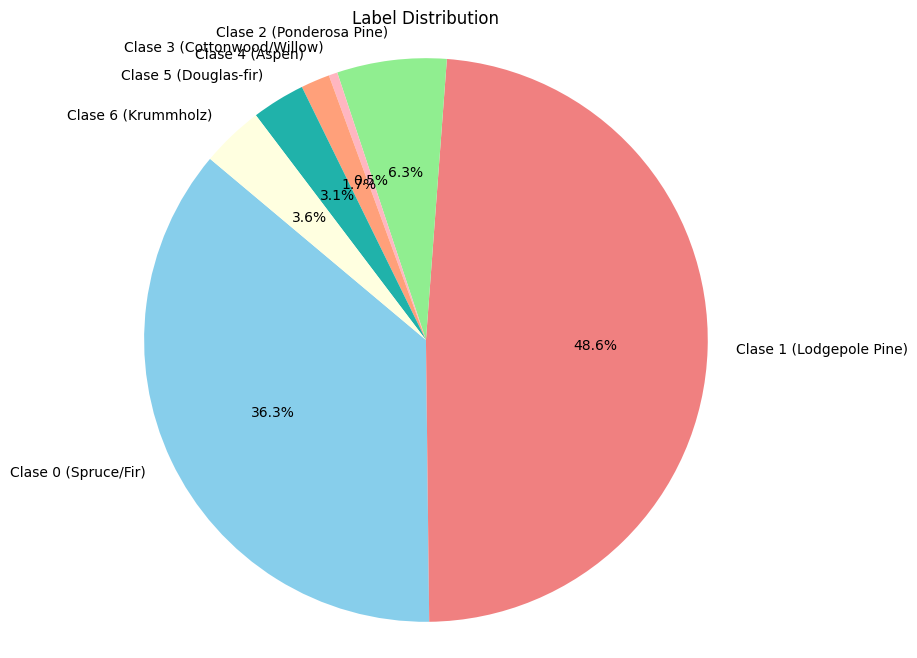

In [ ]:

clases = ['Clase 0 (Spruce/Fir)', 'Clase 1 (Lodgepole Pine)', 'Clase 2 (Ponderosa Pine)', 'Clase 3 (Cottonwood/Willow)', 'Clase 4 (Aspen)', 'Clase 5 (Douglas-fir)', 'Clase 6 (Krummholz)']
recuentos = [114008, 152755, 19730, 1575, 5207, 9597, 11238]

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(recuentos, labels=clases, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightyellow'])
plt.title('Label Distribution')

# Mostrar el gráfico
plt.axis('equal')  # Proporciona un círculo perfecto
plt.show()

Aplicamos SMOTE para balancear el dataset

In [5]:
# under_sampler = RandomUnderSampler(sampling_strategy={1: 20000, 0: 20000})
# X_data, Y_data = under_sampler.fit_resample(X_data, Y_data)

smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)

# Aplica SMOTE para sobremuestrear los datos
X_resampled, y_resampled = smote.fit_resample(X_data, Y_data)

# adasyn = ADASYN(n_neighbors=15, random_state=42)

# X_resampled, y_resampled = adasyn.fit_resample(X_data, Y_data)


# ros = RandomOverSampler(random_state=42)
# X_resampled, Y_resampled = ros.fit_resample(X_data, Y_data)


In [32]:
# y_resampled.value_counts()
y_resampled.value_counts()

54
0    152755
1    152755
2    152755
5    152755
6    152755
4    152755
3    152755
Name: count, dtype: int64

#### Correlation and mutual information

##### Matrix of correlation

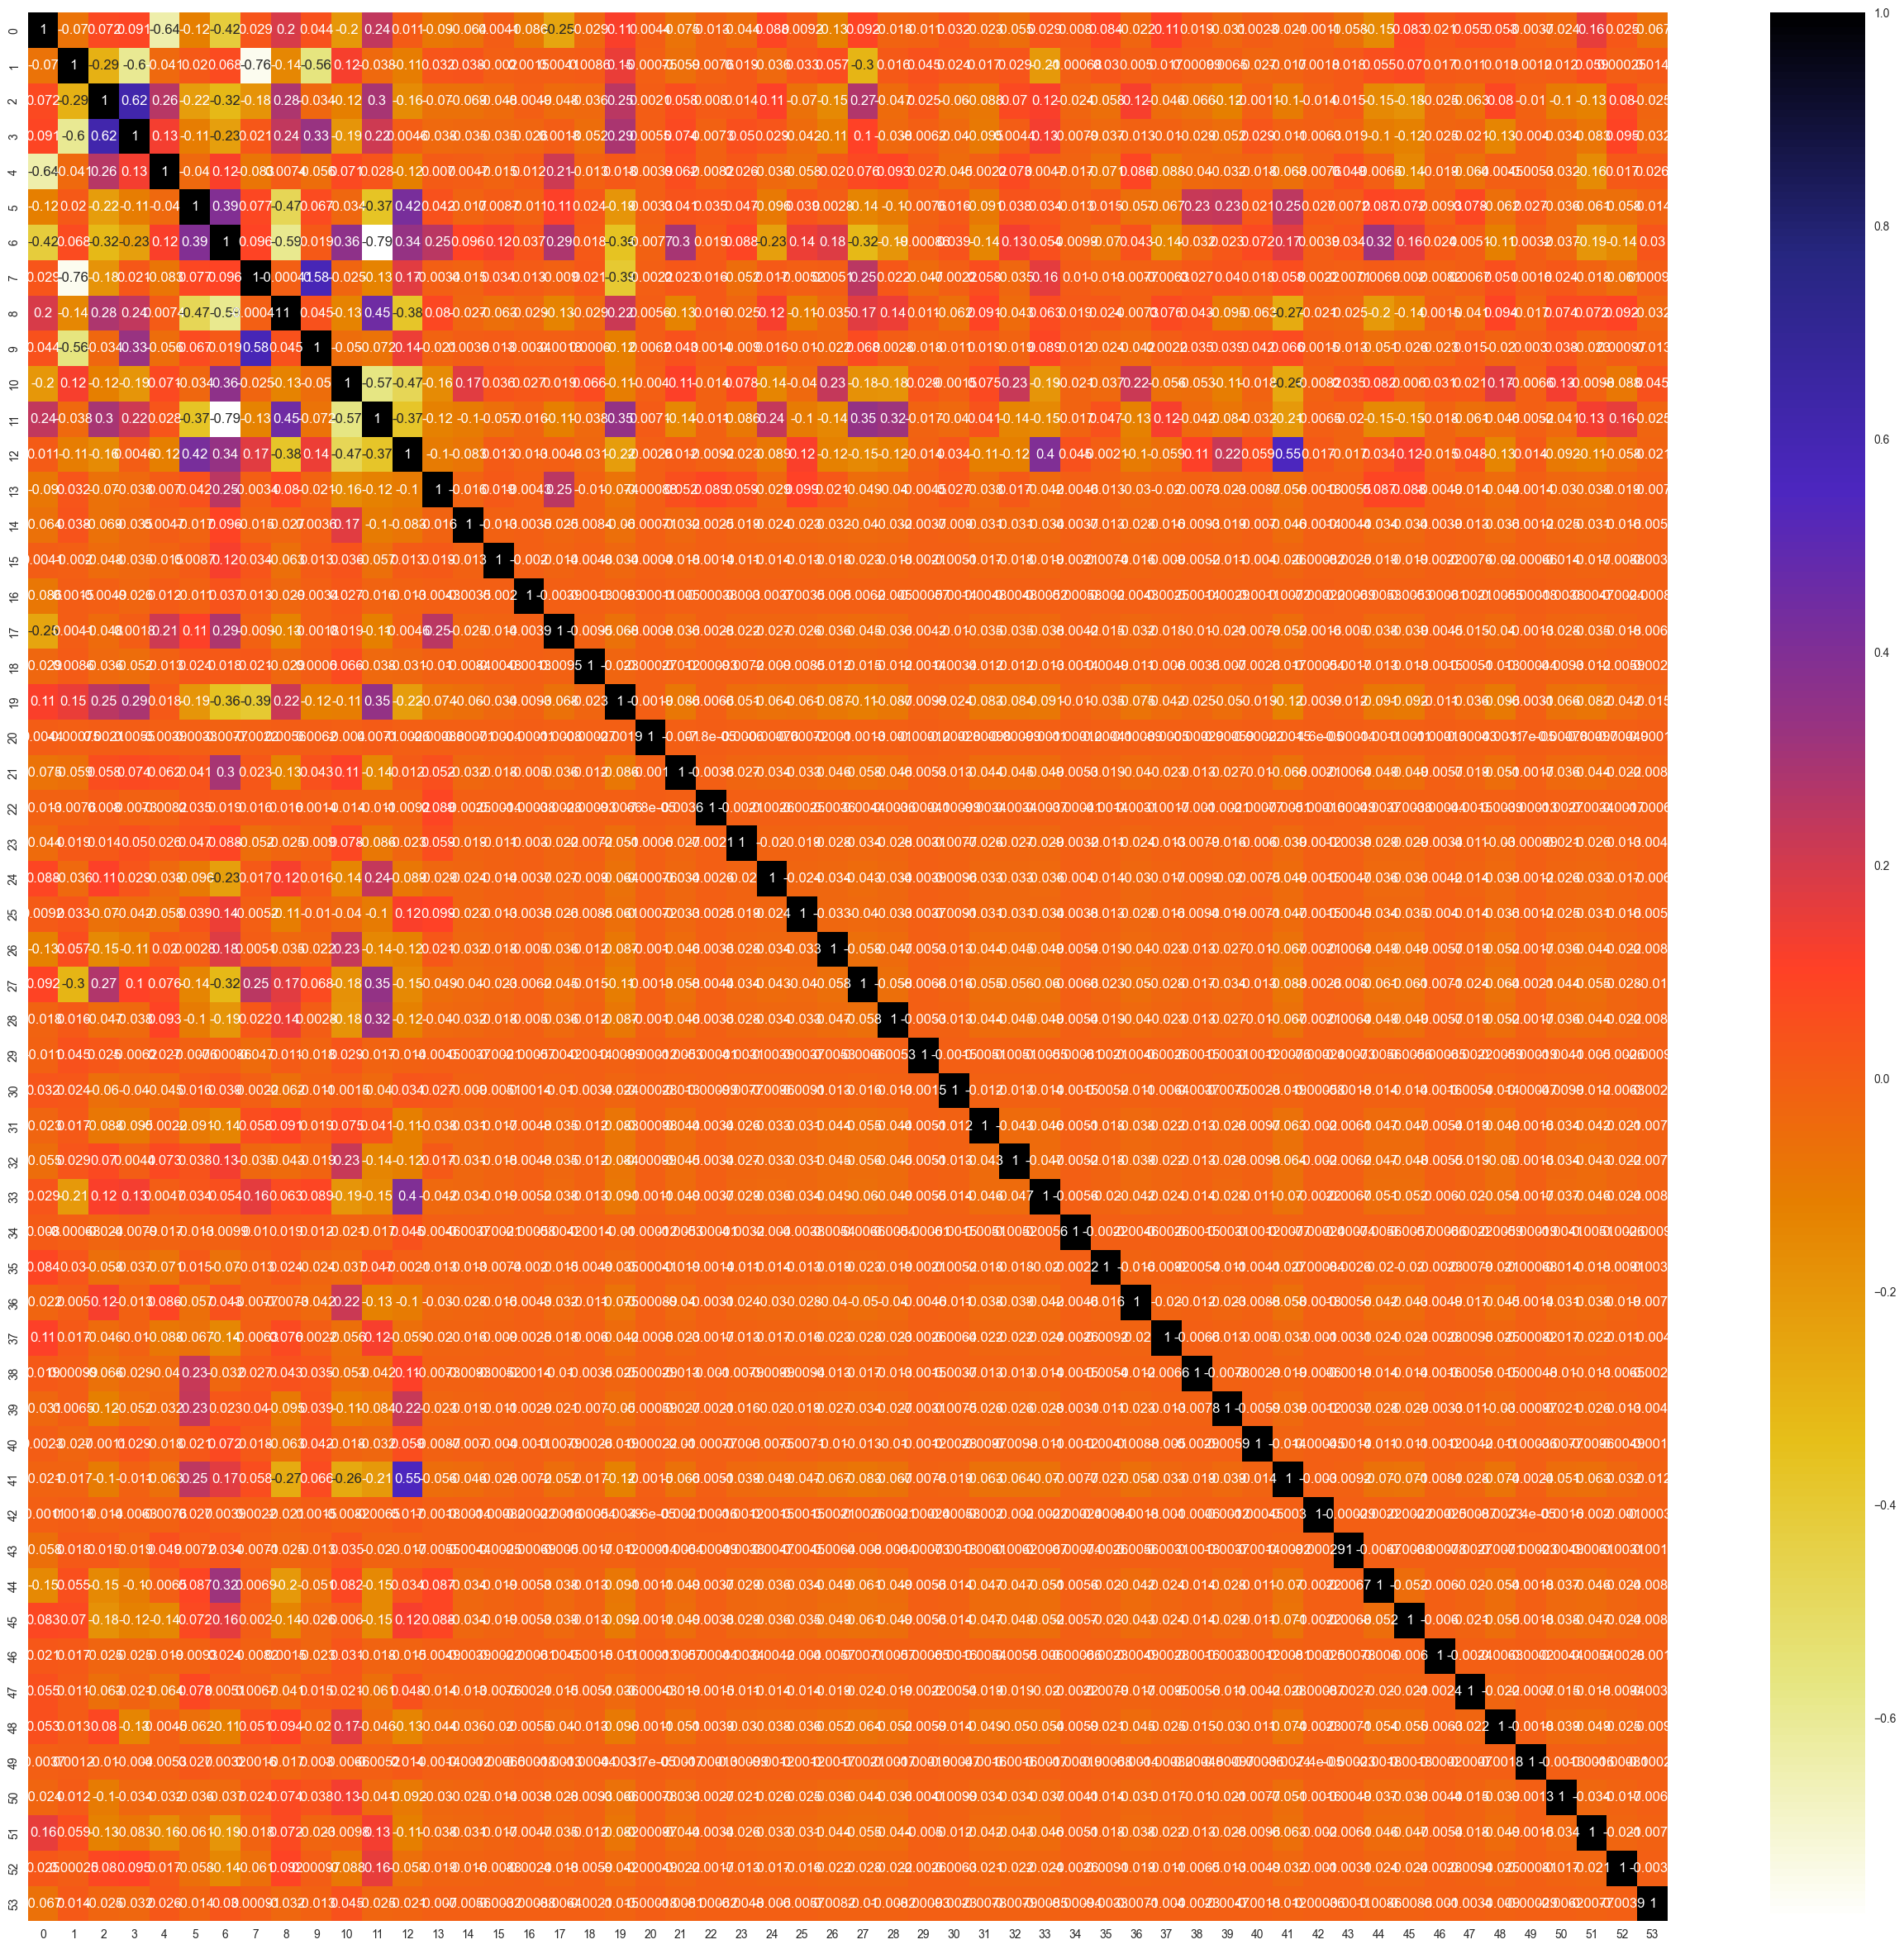

In [60]:
import seaborn as sns
plt.figure(figsize=(32,30))
cor = X_resampled.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

Given a dataset and a specific threshold, this function returns a tuple of the columns with a correlation greater than 0.7

In [61]:
def correlation(dataset, threshold):
    corr_matrix = dataset.corr()
    correlated_features = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname_i = corr_matrix.columns[i]
                colname_j = corr_matrix.columns[j]
                correlated_features.append((colname_i, colname_j))

    return correlated_features

In [62]:
corr_features = correlation(X_resampled, 0.7)
print(corr_features)

[('7', '1'), ('11', '6')]


Features (7, 1) and (11, 6) are highly correlated

##### Information gain

In [22]:
mutual_info = mutual_info_classif(X_resampled, y_resampled)
mutual_info

array([4.29737742e-01, 3.93252098e-01, 3.23050165e-01, 3.46893938e-01,
       3.98423127e-01, 5.13869558e-01, 1.22350806e+00, 4.23177532e-01,
       6.14973635e-01, 4.18281495e-01, 1.23219205e-01, 4.41745285e-01,
       1.84172579e-01, 3.29332398e-02, 1.27373721e-02, 1.08571804e-02,
       8.69111931e-04, 4.64884099e-02, 3.23089305e-03, 1.37134203e-01,
       0.00000000e+00, 7.62927224e-02, 1.36643606e-03, 1.14787534e-02,
       2.17394537e-02, 2.97922942e-02, 2.34595457e-02, 1.04626917e-01,
       3.81111427e-02, 1.48581834e-03, 4.62126964e-03, 2.98885283e-02,
       1.94783678e-02, 5.35581228e-02, 2.25674102e-03, 3.86754520e-03,
       3.19708628e-02, 1.35913311e-02, 4.64663314e-03, 2.55427574e-02,
       3.62263345e-03, 6.94448641e-02, 0.00000000e+00, 1.10195330e-03,
       8.38660544e-02, 3.73900605e-02, 4.10084824e-04, 4.76999823e-03,
       3.98531020e-02, 1.24732228e-03, 1.28386744e-02, 3.30314421e-02,
       8.66950852e-03, 9.93966317e-04])

Now we sort the features based on their dependency with the target variable

In [23]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_data.columns
mutual_info = mutual_info.sort_values(ascending=False)

# Imprime el índice y el valor de la información mutua
for index, value in mutual_info.items():
    # print(f"Feature {index}: {value}")
    print(f"Feature {index}: {value}")


Feature 6: 1.2235080632880293
Feature 8: 0.6149736349073209
Feature 5: 0.5138695576580368
Feature 11: 0.4417452845270122
Feature 0: 0.4297377416124921
Feature 7: 0.4231775320036104
Feature 9: 0.41828149499330536
Feature 4: 0.39842312684867354
Feature 1: 0.39325209792300697
Feature 3: 0.34689393802856117
Feature 2: 0.32305016481161264
Feature 12: 0.18417257897699546
Feature 19: 0.1371342031202527
Feature 10: 0.1232192050589771
Feature 27: 0.10462691672324231
Feature 44: 0.08386605441750072
Feature 21: 0.07629272241566598
Feature 41: 0.06944486411256356
Feature 33: 0.05355812277414884
Feature 17: 0.04648840989722114
Feature 48: 0.03985310202435022
Feature 28: 0.03811114272733329
Feature 45: 0.03739006046619853
Feature 51: 0.03303144213480547
Feature 13: 0.03293323983816876
Feature 36: 0.03197086275585459
Feature 31: 0.029888528344637955
Feature 25: 0.02979229420110263
Feature 39: 0.025542757406740613
Feature 26: 0.023459545694852313
Feature 24: 0.0217394537288067
Feature 32: 0.0194783678

<Axes: >

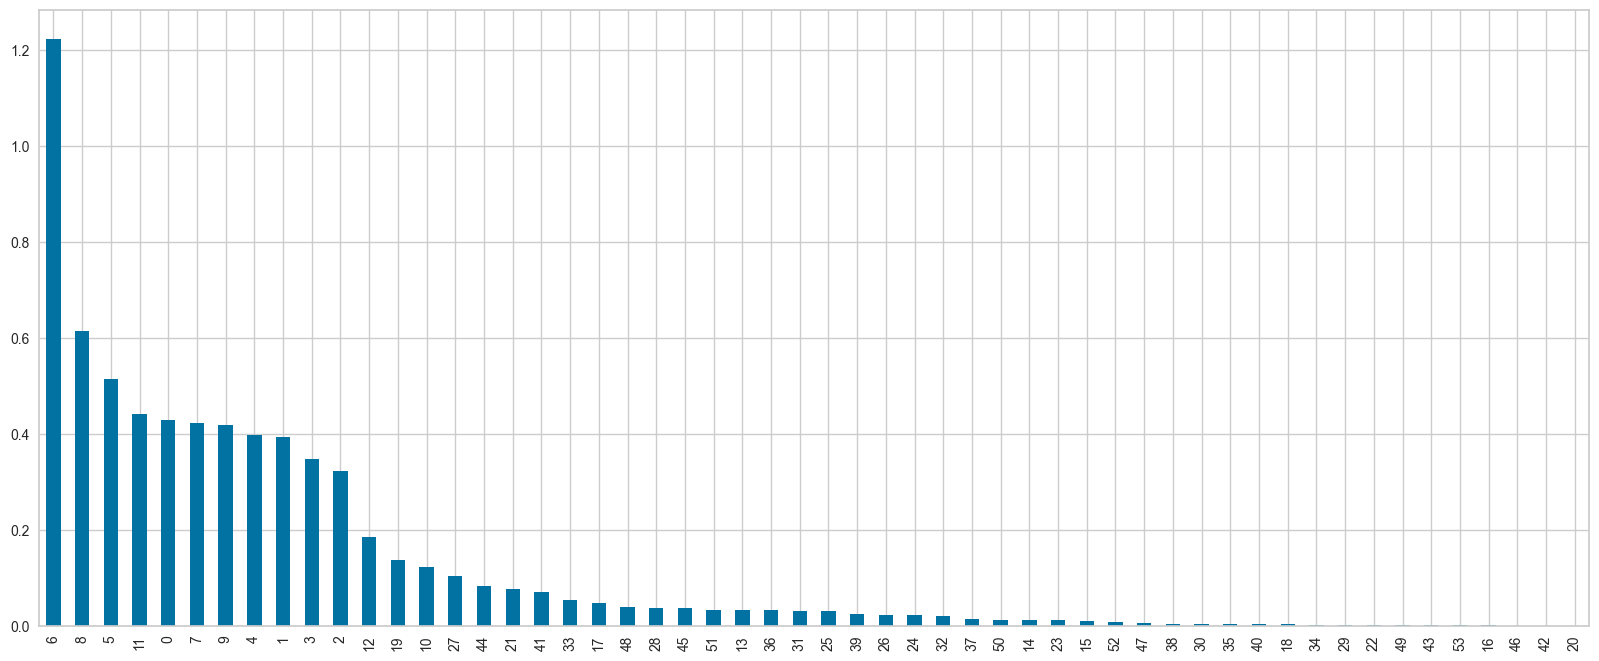

In [24]:
mutual_info.sort_values(ascending = False).plot.bar(figsize=(20, 8))

In [46]:
selected_features = mutual_info[mutual_info > 0.01].index
selected_features_sorted = sorted(selected_features, key=lambda x: int(x))

# Crea un nuevo DataFrame solo con las características seleccionadas
X_resampled = X_resampled[selected_features_sorted]
data_test_df = data_test_df[selected_features_sorted]


X_resampled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,19,21,23,24,25,26,27,28,31,32,33,36,37,39,41,44,45,48,50,51
0,0.937799,-0.569134,-0.080622,0.272901,-0.952273,1.490230,0.568602,0.952543,0.332439,0.585623,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.240679,0.253811,0.280067,-1.404449,-0.232382,-0.140896,0.713331,0.854541,0.712140,-0.298397,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,-0.419924,-1.858633,1.507141,2.252066,1.301855,0.936071,0.592369,0.901201,0.732615,0.847882,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.371925,0.145295,-1.603917,-0.764398,-0.011060,0.681558,0.585943,0.871462,0.737043,0.384208,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.937793,-0.171014,-0.556337,0.228163,-0.745817,1.014475,0.497108,0.867228,0.498590,1.034649,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 4º Preprocess

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle=True, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, shuffle=True, random_state=42)

## 5º Results

Preparación de algunos parámetros generales

In [7]:
# Define the given custom cost function in the description of the problem
cost_matrix = [
        [0, 5, 1, 1, 1, 1, 1],
        [10, 0, 1, 1, 1, 1, 1],
        [20, 20, 0, 5, 5, 50, 5],
        [20, 20, 10, 0, 1, 50, 5],
        [20, 100, 5, 1, 0, 5, 5],
        [5, 10, 10, 5, 1, 0, 1],
        [10, 5, 1, 1, 1, 1, 0]
    ]

def custom_cost_score(y_true, y_pred):
    return np.mean([cost_matrix[int(y_true_i)][int(y_pred_i)] for y_true_i, y_pred_i in zip(y_true, y_pred)])

# Crear un scorer personalizado. Asegúrate de que 'custom_cost_score' esté definido como se espera.
custom_scorer = make_scorer(custom_cost_score, greater_is_better=False) # Asumiendo que menor costo es mejor

value_counts = Y_data.value_counts()

# Calculando los pesos de cada clase
label_weights = {cls: 1/count for cls, count in value_counts.items()}
print(label_weights)


{1: 6.5464305587378485e-06, 0: 8.771314293733774e-06, 2: 5.0684237202230105e-05, 6: 8.898380494749955e-05, 5: 0.00010419922892570594, 4: 0.00019204916458613405, 3: 0.0006349206349206349}


#### XGboost

In [9]:
def train_xg(X_train, y_train, n_estimators, max_depth, class_weights):
    xg = xgb.XGBClassifier(
        n_estimators=n_estimators,
        learning_rate = 0.01,
        gamma = 0.2,
        objective = 'softmax',
        num_class = 7,
        # criterion='entropy',
        # class_weight=class_weights,
        random_state=42,
        # bootstrap=False,
        n_jobs=-1,
        max_depth=max_depth
    )
    xg.fit(X_train, y_train)
    return xg

def evaluate_model(xg, X_test, y_test, cost_matrix):
    y_pred = xg.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Random Forest with {xg.n_estimators} trees:')
    print('Confusion Matrix:\n', cm)
    print('First Cost:\n', custom_cost_score(y_test, y_pred))
    y_pred_adjusted = adjust_predictions(xg.predict_proba(X_test), cost_matrix)
    cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
    print('Adjusted Confusion Matrix:\n', cm_adjusted)
    print('Adjusted Accuracy:', accuracy_score(y_test, y_pred_adjusted))
    print('Adjusted Cost:', custom_cost_score(y_test, y_pred_adjusted))

def adjust_predictions(probs, cost_matrix):
    cost_preds = np.dot(probs, cost_matrix)
    return np.argmin(cost_preds, axis=1)

# Main execution
n_estimators = 2000
max_depth = 40

xg = train_xg(X_train, y_train, n_estimators, max_depth, label_weights)
evaluate_model(xg, X_test, y_test, cost_matrix)

# Predicciones en un nuevo conjunto de datos
# y_pred_final = adjust_predictions(xg.predict_proba(data_test_df), cost_matrix)
# predictions_df = pd.DataFrame({'Id': range(len(y_pred_final)), 'Category': y_pred_final})
# predictions_df.to_csv('../PREDICCIONES/predicciones_rf_dataFantasyXG_final.csv', index=False)


In [11]:
# Main execution
n_estimators = 2000
max_depth = 40
xg = train_xg(X_resampled, y_resampled, n_estimators, max_depth, label_weights)

y_pred_final = adjust_predictions(xg.predict_proba(data_test_df), cost_matrix)
predictions_df = pd.DataFrame({'Id': range(len(y_pred_final)), 'Category': y_pred_final})
predictions_df.to_csv('../PREDICCIONES/predicciones_rf_dataFantasyXG_final_all.csv', index=False)

In [8]:
def train_xg(X_train, y_train, n_estimators, max_depth, class_weights):
    xg = xgb.XGBClassifier(
        n_estimators=n_estimators,
        learning_rate = 0.01,
        gamma = 0.2,
        objective = 'softmax',
        num_class = 7,
        # criterion='entropy',
        # class_weight=class_weights,
        random_state=42,
        # bootstrap=False,
        n_jobs=-1,
        max_depth=max_depth
    )
    xg.fit(X_train, y_train)
    return xg

def evaluate_model(xg, X_test, y_test, cost_matrix):
    y_pred = xg.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Random Forest with {xg.n_estimators} trees:')
    print('Confusion Matrix:\n', cm)
    print('First Cost:\n', custom_cost_score(y_test, y_pred))
    y_pred_adjusted = adjust_predictions(xg.predict_proba(X_test), cost_matrix)
    cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
    print('Adjusted Confusion Matrix:\n', cm_adjusted)
    print('Adjusted Accuracy:', accuracy_score(y_test, y_pred_adjusted))
    print('Adjusted Cost:', custom_cost_score(y_test, y_pred_adjusted))

def adjust_predictions(probs, cost_matrix):
    cost_preds = np.dot(probs, cost_matrix)
    return np.argmin(cost_preds, axis=1)

# Main execution
n_estimators = 2000
max_depth = 30

xg = train_xg(X_train, y_train, n_estimators, max_depth, label_weights)
evaluate_model(xg, X_test, y_test, cost_matrix)

# Predicciones en un nuevo conjunto de datos
y_pred_final = adjust_predictions(xg.predict_proba(data_test_df), cost_matrix)
predictions_df = pd.DataFrame({'Id': range(len(y_pred_final)), 'Category': y_pred_final})
predictions_df.to_csv('../PREDICCIONES/predicciones_rf_dataFantasyXG_final.csv', index=False)


Random Forest with 2000 trees:
Confusion Matrix:
 [[29656   782     0     0    21     6   106]
 [  716 29598    78     0   148    69    15]
 [    0     9 30463    40     5    91     0]
 [    0     0     6 30413     0     4     0]
 [    0    11     6     0 30681     2     0]
 [    2     9    46    14     4 30377     0]
 [   30     4     0     0     0     0 30445]]
First Cost:
 0.0880120828404027
Adjusted Confusion Matrix:
 [[27595   280     4     0  1909    10   773]
 [  159 27248   285     0  2269   118   545]
 [    0     0 30423    53   125     7     0]
 [    0     0     3 30411     9     0     0]
 [    0     0     5     0 30694     1     0]
 [    0     1    25     8   755 29663     0]
 [    4     2     0     0     2     0 30471]]
Adjusted Accuracy: 0.965621887522971
Adjusted Cost: 0.052927891067395504


(kn=17) Esto es lo máximo por ahora, solo quedaría probar:
    - PCA en one hot encoding?
    - Voting classifier

In [17]:
def train_xg(X_train, y_train, n_estimators, max_depth, class_weights):
    xg = xgb.XGBClassifier(
        n_estimators=n_estimators,
        learning_rate = 0.009,
        gamma = 0.2,
        objective = 'softmax',
        num_class = 7,
        # criterion='entropy',
        # class_weight=class_weights,
        random_state=42,
        # bootstrap=False,
        n_jobs=-1,
        max_depth=max_depth
    )
    xg.fit(X_train, y_train)
    return xg

def evaluate_model(xg, X_test, y_test, cost_matrix):
    y_pred = xg.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Random Forest with {xg.n_estimators} trees:')
    print('Confusion Matrix:\n', cm)
    print('First Cost:\n', custom_cost_score(y_test, y_pred))
    y_pred_adjusted = adjust_predictions(xg.predict_proba(X_test), cost_matrix)
    cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
    print('Adjusted Confusion Matrix:\n', cm_adjusted)
    print('Adjusted Accuracy:', accuracy_score(y_test, y_pred_adjusted))
    print('Adjusted Cost:', custom_cost_score(y_test, y_pred_adjusted))

def adjust_predictions(probs, cost_matrix):
    cost_preds = np.dot(probs, cost_matrix)
    return np.argmin(cost_preds, axis=1)

# Main execution
n_estimators = 2000
max_depth = 30

xg = train_xg(X_train, y_train, n_estimators, max_depth, label_weights)
evaluate_model(xg, X_test, y_test, cost_matrix)

# Predicciones en un nuevo conjunto de datos
y_pred_final = adjust_predictions(xg.predict_proba(data_test_df), cost_matrix)
predictions_df = pd.DataFrame({'Id': range(len(y_pred_final)), 'Category': y_pred_final})
predictions_df.to_csv('../PREDICCIONES/predicciones_rf_dataFantasyXG_final_adasyn.csv', index=False)


Random Forest with 2000 trees:
Confusion Matrix:
 [[29531   867     0     0    41     8   124]
 [  744 29509    86     0   178    87    20]
 [    0    14 30208    93    12   281     0]
 [    0     0    30 30379     0    14     0]
 [    4    25    14     0 30645    12     0]
 [    1    12   165    33     5 30236     0]
 [   50     8     0     0     0     0 30421]]
First Cost:
 0.1560341723675166
Adjusted Confusion Matrix:
 [[27413   303     8     0  2005    12   830]
 [  134 26872   319     0  2611   121   567]
 [    0     3 30081   115   390    19     0]
 [    0     0    20 30371    31     1     0]
 [    0     0    14     0 30681     5     0]
 [    0     0   116    20  1795 28521     0]
 [    9     1     0     0     0     0 30469]]
Adjusted Accuracy: 0.9558162697503472
Adjusted Cost: 0.07663532173368186


In [31]:
# Main execution
n_estimators = 2000
max_depth = 30
xg = train_xg(X_resampled, y_resampled, n_estimators, max_depth, label_weights)

y_pred_final = adjust_predictions(xg.predict_proba(data_test_df), cost_matrix)
predictions_df = pd.DataFrame({'Id': range(len(y_pred_final)), 'Category': y_pred_final})
predictions_df.to_csv('../PREDICCIONES/predicciones_rf_dataFantasyXG_final_all.csv', index=False)


#### Random Forest

In [42]:
# Definiendo el modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

# Creando un diccionario de los parámetros para la búsqueda de cuadrícula
param_distributions  = {
    'n_estimators': [20],  # Número de árboles
    'max_features': [None, 'sqrt'],  # Número de características a considerar en cada división
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en un nodo hoja
    'bootstrap': [True, False],
    'class_weight': [None, label_weights],
    'criterion': ['gini', 'entropy']
}

# Configurando GridSearchCV
RS_rf  = RandomizedSearchCV(estimator=rf, error_score=custom_scorer, param_distributions =param_distributions , cv=3,n_iter=10)

# Entrenando el modelo con GridSearchCV
RS_rf .fit(X_train, y_train)

# Imprimiendo los mejores parámetros y el mejor score
print("Mejores parámetros:", RS_rf .best_params_)
print("Mejor score:", RS_rf .best_score_)

# Probando el modelo con los mejores parámetros en el conjunto de prueba
best_rf = RS_rf .best_estimator_
test_score = best_rf.score(X_test, y_test)
print("Score en el conjunto de prueba:", test_score)

Mejores parámetros: {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}
Mejor score: 0.9672526505438874
Score en el conjunto de prueba: 0.9726172161771651


In [69]:
def train_random_forest(X_train, y_train, n_estimators, max_depth, class_weights):
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        # min_samples_split=10,
        # min_samples_leaf=2,
        criterion='entropy',
        # class_weight=class_weights,
        # max_features='sqrt',
        random_state=42,
        bootstrap=False,
        n_jobs=-1,
        max_depth=max_depth
    )
    rf_classifier.fit(X_train, y_train)
    return rf_classifier

def evaluate_model(rf_classifier, X_test, y_test, cost_matrix):
    y_pred = rf_classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Random Forest with {rf_classifier.n_estimators} trees:')
    print('Confusion Matrix:\n', cm)
    print('First Cost:\n', custom_cost_score(y_test, y_pred))
    y_pred_adjusted = adjust_predictions(rf_classifier.predict_proba(X_test), cost_matrix)
    cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
    print('Adjusted Confusion Matrix:\n', cm_adjusted)
    print('Adjusted Accuracy:', accuracy_score(y_test, y_pred_adjusted))
    print('Adjusted Cost:', custom_cost_score(y_test, y_pred_adjusted))

def adjust_predictions(probs, cost_matrix):
    cost_preds = np.dot(probs, cost_matrix)
    return np.argmin(cost_preds, axis=1)

# Main execution
n_estimators = 100
max_depth = 50

rf_classifier = train_random_forest(X_train, y_train, n_estimators, max_depth, label_weights)
evaluate_model(rf_classifier, X_test, y_test, cost_matrix)

# Predicciones en un nuevo conjunto de datos
# y_pred_final = adjust_predictions(rf_classifier.predict_proba(data_test_df), cost_matrix)
# predictions_df = pd.DataFrame({'Id': range(len(y_pred_final)), 'Category': y_pred_final})
# predictions_df.to_csv('../PREDICCIONES/predicciones_rf_dataFantasy2.csv', index=False)


Random Forest with 100 trees:
Confusion Matrix:
 [[29096  1268     4     0    46    11   146]
 [  913 29169   147     4   215   159    17]
 [    0    12 29812   177    26   581     0]
 [    0     0    35 30370     0    18     0]
 [    5    75    22     0 30584    14     0]
 [    0    20   386    74    13 29959     0]
 [   40     9     0     0     0     0 30430]]
First Cost:
 0.28262811130802357
Adjusted Confusion Matrix:
 [[19252    85  5110     0  3069   168  2887]
 [   28 15287  3978     3 10323   275   730]
 [    0     0 28900   295  1410     3     0]
 [    0     0     4 30259   160     0     0]
 [    0     0    19     0 30681     0     0]
 [    0     0   113    20 13048 17259    12]
 [    1     1     0     0     2     0 30475]]
Adjusted Accuracy: 0.804804144825748
Adjusted Cost: 0.23625600284302128


#### Extra Trees

In [ ]:
def train_extra_trees(X_train, y_train, n_estimators, max_depth, class_weights):
    et_classifier = ExtraTreesClassifier(
        n_estimators=n_estimators,
        criterion='entropy',
        # class_weight=class_weights,
        random_state=42,
        bootstrap=False,
        n_jobs=-1,
        max_depth=max_depth
    )
    et_classifier.fit(X_train, y_train)
    return et_classifier

def evaluate_model(et_classifier, X_test, y_test, cost_matrix):
    y_pred = et_classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Random Forest with {et_classifier.n_estimators} trees:')
    print('Confusion Matrix:\n', cm)
    print('First Cost:\n', custom_cost_score(y_test, y_pred))
    y_pred_adjusted = adjust_predictions(et_classifier.predict_proba(X_test), cost_matrix)
    cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
    print('Adjusted Confusion Matrix:\n', cm_adjusted)
    print('Adjusted Accuracy:', accuracy_score(y_test, y_pred_adjusted))
    print('Adjusted Cost:', custom_cost_score(y_test, y_pred_adjusted))

def adjust_predictions(probs, cost_matrix):
    cost_preds = np.dot(probs, cost_matrix)
    return np.argmin(cost_preds, axis=1)

def custom_cost_score(y_true, y_pred):
    return np.mean([cost_matrix[int(y_true_i)][int(y_pred_i)] for y_true_i, y_pred_i in zip(y_true, y_pred)])

# Main execution
n_estimators = 20
max_depth = None

et_classifier = train_extra_trees(X_train, y_train, n_estimators, max_depth, label_weights)
evaluate_model(et_classifier, X_test, y_test, cost_matrix)

# Predicciones en un nuevo conjunto de datos
y_pred_final = adjust_predictions(et_classifier.predict_proba(data_test_df), cost_matrix)
predictions_df = pd.DataFrame({'Id': range(len(y_pred_final)), 'Category': y_pred_final})
predictions_df.to_csv('../PREDICCIONES/predicciones_rf_dataFantasy.csv', index=False)

#### Deep Neural Network (MLP)

- Probar a no hacer smote y usar los pesos
- Probar pesos diferentes

In [7]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Epoch 1/30
14135/14135 [==============================] - 31s 2ms/step - loss: 0.6135 - accuracy: 0.7346 - precision_m: 0.7477 - recall_m: 0.7096 - f1_m: 0.7269 - val_loss: 0.5141 - val_accuracy: 0.7781 - val_precision_m: 0.7895 - val_recall_m: 0.7638 - val_f1_m: 0.7760
Epoch 2/30
14135/14135 [==============================] - 28s 2ms/step - loss: 0.4766 - accuracy: 0.7946 - precision_m: 0.8058 - recall_m: 0.7792 - f1_m: 0.7919 - val_loss: 0.4383 - val_accuracy: 0.8157 - val_precision_m: 0.8260 - val_recall_m: 0.8044 - val_f1_m: 0.8147
Epoch 3/30
14135/14135 [==============================] - 28s 2ms/step - loss: 0.4158 - accuracy: 0.8243 - precision_m: 0.8338 - recall_m: 0.8125 - f1_m: 0.8227 - val_loss: 0.3961 - val_accuracy: 0.8317 - val_precision_m: 0.8389 - val_recall_m: 0.8239 - val_f1_m: 0.8311
Epoch 4/30
14135/14135 [==============================] - 28s 2ms/step - loss: 0.3764 - accuracy: 0.8427 - precision_m: 0.8509 - recall_m: 0.8327 - f1_m: 0.8414 - val_loss: 0.3719 - val_a

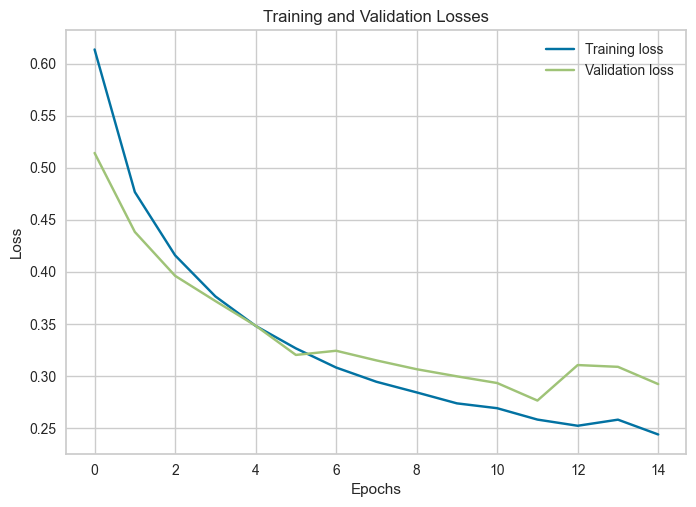

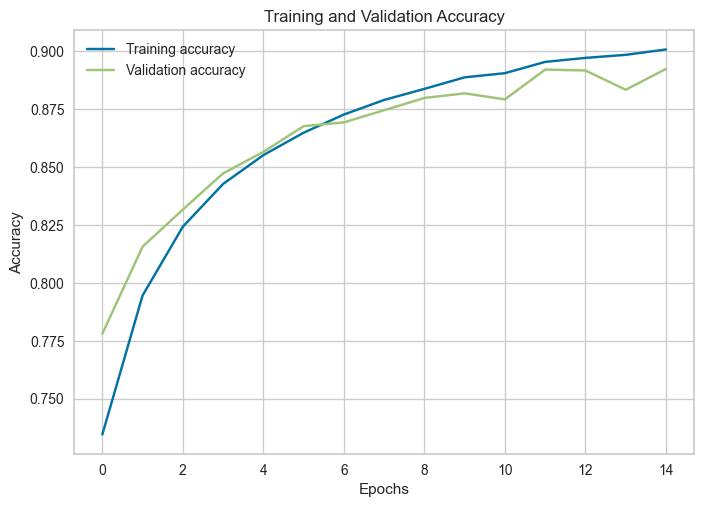

1964/1964 [==============================] - 2s 1ms/step
Confusion Matrix:
 [[19467  3036     2     0    31    11   162]
 [ 1362 28609   121     0   213    80    20]
 [   15   175  3676    48     3   146     0]
 [    0     0    59   240     0    19     0]
 [   32   247    39     0   698     1     0]
 [    5   230   492     5     1  1263     0]
 [  214    29     0     0     0     0  2071]]
First Cost:
 1.2325459234026297
1964/1964 [==============================] - 2s 1ms/step
Adjusted Confusion Matrix:
 [[14248   813     3     0  3655     1  3989]
 [  141 21586   594     0  7132    35   917]
 [    5     3  3600    69   384     2     0]
 [    0     0    21   238    59     0     0]
 [    1    14    42     0   959     1     0]
 [    1    10   338     1  1351   295     0]
 [   20     6     0     0     1     0  2287]]
Adjusted Accuracy: 0.687864124032982
Adjusted Cost: 0.49826493903409635


In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.losses import Loss
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

y_train_one_hot = to_categorical(y_train, num_classes=7)


dnn = Sequential()

# Ajusta el número de neuronas y capas según sea necesario
dnn.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu')) # Capa de entrada

dnn.add(Dense(512, activation='relu')) # Primera capa oculta

dnn.add(Dense(256, activation='relu')) # Segunda capa oculta

dnn.add(Dense(128, activation='relu')) # tercera capa oculta

dnn.add(Dense(64, activation='relu')) # cuarta capa oculta

dnn.add(Dense(32, activation='relu')) # quinta capa oculta

dnn.add(Dense(7, activation='softmax')) # Capa de salida


optimizer = Adam(learning_rate=0.001, beta_1=0.93, beta_2=0.999, epsilon=1e-07)
# Compila el modelo con la función de pérdida personalizada y un optimizador
dnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy',precision_m, recall_m, f1_m])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001, mode='min')

# Entrena tu modelo (asegúrate de proporcionar los datos de entrenamiento y etiquetas correctos)
history = dnn.fit(X_train, y_train_one_hot, epochs=30, batch_size=16, validation_split=0.1, callbacks=[early_stopping])

# Grafica las pérdidas de entrenamiento y validación
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Grafica la precisión de entrenamiento y validación
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

def adjust_predictions(probs, cost_matrix):
    cost_preds = np.dot(probs, cost_matrix)
    return np.argmin(cost_preds, axis=1)

def custom_loss_func(y_true, y_pred):
    return np.mean([cost_matrix[int(y_true_i)][int(y_pred_i)] for y_true_i, y_pred_i in zip(y_true, y_pred)])

y_pred = np.argmax(dnn.predict(X_test), axis = 1)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)
print('First Cost:\n', custom_loss_func(y_test, y_pred))
y_pred_adjusted = adjust_predictions(dnn.predict(X_test), cost_matrix)
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print('Adjusted Confusion Matrix:\n', cm_adjusted)
print('Adjusted Accuracy:', accuracy_score(y_test, y_pred_adjusted))
print('Adjusted Cost:', custom_loss_func(y_test, y_pred_adjusted))


In [32]:
def adjust_predictions(probs, cost_matrix):
    cost_preds = np.dot(probs, cost_matrix)
    return np.argmin(cost_preds, axis=1)

def custom_loss_func(y_true, y_pred):
    return np.mean([cost_matrix[int(y_true_i)][int(y_pred_i)] for y_true_i, y_pred_i in zip(y_true, y_pred)])

y_pred = np.argmax(dnn.predict(X_test), axis = 1)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)
print('First Cost:\n', custom_loss_func(y_test, y_pred))
y_pred_adjusted = adjust_predictions(dnn.predict(X_test), cost_matrix)
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print('Adjusted Confusion Matrix:\n', cm_adjusted)
print('Adjusted Accuracy:', accuracy_score(y_test, y_pred_adjusted))
print('Adjusted Cost:', custom_loss_func(y_test, y_pred_adjusted))

# Predicciones en un nuevo conjunto de datos
y_pred_final = adjust_predictions(dnn.predict(data_test_df), cost_matrix)
predictions_df = pd.DataFrame({'Id': range(len(y_pred_final)), 'Category': y_pred_final})
predictions_df.to_csv('../PREDICCIONES/predicciones_dnn_dataFantasy.csv', index=False)

6684/6684 [==============================] - 11s 2ms/step
Confusion Matrix:
 [[28410  1722     5     0    72     9   353]
 [ 2143 27441   251     0   561   174    54]
 [    2    19 29347   327    40   873     0]
 [    0     0    27 30373     0    23     0]
 [    8    89    48     0 30539    16     0]
 [    1    58   864   217    21 29291     0]
 [  138    13     0     0     0     0 30328]]
First Cost:
 0.46760218276698917
6684/6684 [==============================] - 11s 2ms/step
Adjusted Confusion Matrix:
 [[23738   532    17     0  5120    15  1149]
 [  321 23214   456     0  5858   236   539]
 [    0     1 28908   424  1205    70     0]
 [    0     0     5 30315   103     0     0]
 [    0     2    47     0 30649     1     1]
 [    0     5   527   116  6937 22867     0]
 [   20     2     0     0     2     0 30455]]
Adjusted Accuracy: 0.8891268464441192
Adjusted Cost: 0.2084196449029024
8032/8032 [==============================] - 13s 2ms/step


#### Voting Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define los clasificadores con sus parámetros por defecto
random_forest = RandomForestClassifier(n_estimators=150, max_depth=50)
xgb_classifier = xgb.XGBClassifier(n_estimators = 150, learning_rate= 0.01, gamma = 0.2, colsample_bytree = 0.8, max_depth=30)

# Crea una lista de clasificadores para el Voting Classifier
# Nota: No es necesario proporcionar una cuadrícula de parámetros ya que usaremos los valores por defecto.
classifiers = [
    ('Random Forest', random_forest),
    ('Xgboost', xgb_classifier),
]

# Crear el Voting Classifier utilizando el modo de votación 'hard' o 'soft'
# Puedes cambiar entre 'hard' y 'soft' según tu preferencia o requerimientos del problema.
voting_classifier = VotingClassifier(estimators=classifiers, voting='soft')

# Ajustar el clasificador de votación a los datos de entrenamiento
voting_classifier.fit(X_train, y_train)


y_pred_final = voting_classifier.predict(data_test_final)

predictions_df = pd.DataFrame({
    'Id': range(0, len(y_pred_final)),
    'Category': y_pred_final
})

# Guardar las predicciones en un archivo CSV
predictions_df.to_csv('../PREDICCIONES/predicciones_VC.csv', index=False)


c:\Users\jorge\Desktop\UC3M\ASIGNATURAS\DATOS\datos\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\jorge\Desktop\UC3M\ASIGNATURAS\DATOS\datos\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = voting_classifier.predict(X_test)
test_custom_cost_score = custom_cost_score(y_test, y_pred)

print("Custom cost score on test data:", test_custom_cost_score)

Custom cost score on test data: 0.10619245570638323


In [18]:
y_pred_final = voting_classifier.predict(data_test_final)

predictions_df = pd.DataFrame({
    'Id': range(0, len(y_pred_final)),
    'Category': y_pred_final
})

# Guardar las predicciones en un archivo CSV
predictions_df.to_csv('../PREDICCIONES/predicciones_VC.csv', index=False)

c:\Users\jorge\Desktop\UC3M\ASIGNATURAS\DATOS\datos\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\jorge\Desktop\UC3M\ASIGNATURAS\DATOS\datos\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
